# 神經層(Neural Layer)建構
### 程式修改自[Basic training loops](https://www.tensorflow.org/guide/basic_training_loops)

## 載入套件

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

## 生成簡單線性迴歸隨機資料

In [12]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = f(x) + noise

## 繪圖

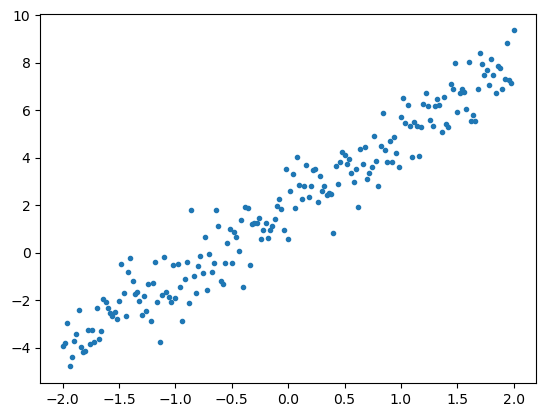

In [13]:
plt.plot(x, y, '.')
plt.show()

## 定義模型

In [14]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # 指定 w/b 任意值
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b

model = MyModel()

# 顯示所有變數
print("Variables:", model.variables)

# 測試模型
assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


### 定義損失函數為 MSE

In [15]:
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

## 繪製模型訓練前預測值

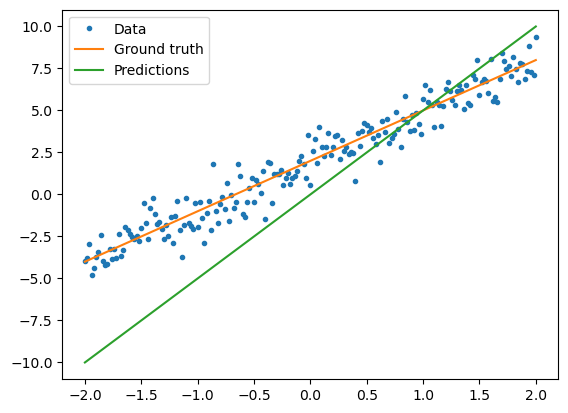

Current loss: 9.957362


In [16]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % loss(y, model(x)).numpy())

## 定義訓練函數

In [17]:
def train(model, x, y, learning_rate):
    # 梯度下降
    with tf.GradientTape() as t:
        current_loss = loss(y, model(x))

    # 計算梯度
    dw, db = t.gradient(current_loss, [model.w, model.b])

    # 權重更新
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

## 訓練

In [18]:
model = MyModel()

# Collect the history of W-values and b-values to plot later
weights = []
biases = []
epochs = range(10)

# Define a training loop
def report(model, loss):
    return f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f}, loss={loss:2.5f}"

def training_loop(model, x, y):
    for epoch in epochs:
        # Update the model with the single giant batch
        train(model, x, y, learning_rate=0.1)

        # Track this before I update
        weights.append(model.w.numpy())
        biases.append(model.b.numpy())
        current_loss = loss(y, model(x))

        print(f"Epoch {(epoch+1):2d}:")
        print("    ", report(model, current_loss))

current_loss = loss(y, model(x))

print(f"Starting:")
print("    ", report(model, current_loss))

training_loop(model, x, y)

Starting:
     W = 5.00, b = 0.00, loss=9.95736
Epoch  1:
     W = 4.46, b = 0.39, loss=6.05728
Epoch  2:
     W = 4.06, b = 0.70, loss=3.83013
Epoch  3:
     W = 3.77, b = 0.95, loss=2.54831
Epoch  4:
     W = 3.56, b = 1.15, loss=1.80459
Epoch  5:
     W = 3.41, b = 1.31, loss=1.36953
Epoch  6:
     W = 3.30, b = 1.44, loss=1.11293
Epoch  7:
     W = 3.21, b = 1.54, loss=0.96037
Epoch  8:
     W = 3.15, b = 1.62, loss=0.86896
Epoch  9:
     W = 3.11, b = 1.69, loss=0.81378
Epoch 10:
     W = 3.08, b = 1.74, loss=0.78024


## 權重更新的變化

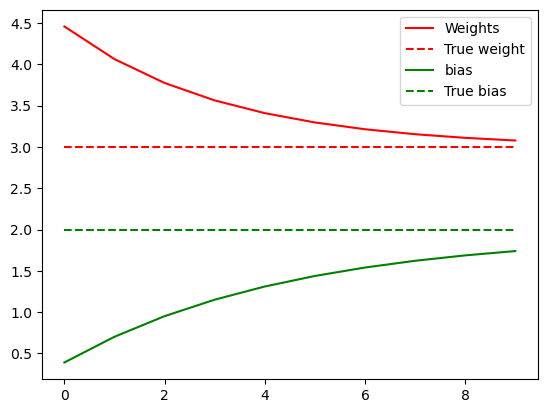

In [19]:
plt.plot(epochs, weights, label='Weights', color='r')
plt.plot(epochs, [TRUE_W] * len(epochs), '--',
         label = "True weight", color='r')

plt.plot(epochs, biases, label='bias', color='g')
plt.plot(epochs, [TRUE_B] * len(epochs), "--",
         label="True bias", color='g')

plt.legend()
plt.show()

## 繪製模型訓練後預測值

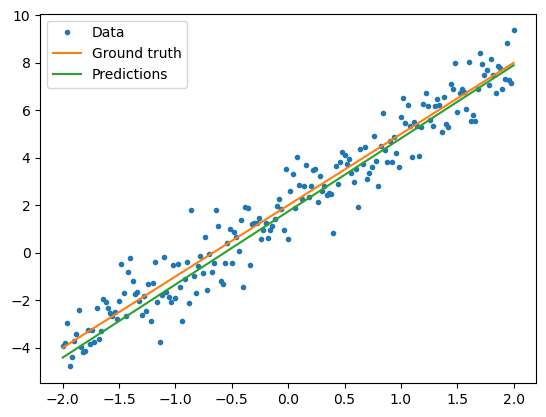

Current loss: 0.780240


In [20]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

## 使用 Keras

In [23]:
# 繼承 Keras Model
class MyModelKeras(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def call(self, x):
        return self.w * x + self.b

keras_model = MyModelKeras()

training_loop(keras_model, x, y)

# 儲存權重
keras_model.save_weights("my_checkpoint.weights.h5")

Epoch  1:
     W = 4.46, b = 0.39, loss=6.05728
Epoch  2:
     W = 4.06, b = 0.70, loss=3.83013
Epoch  3:
     W = 3.77, b = 0.95, loss=2.54831
Epoch  4:
     W = 3.56, b = 1.15, loss=1.80459
Epoch  5:
     W = 3.41, b = 1.31, loss=1.36953
Epoch  6:
     W = 3.30, b = 1.44, loss=1.11293
Epoch  7:
     W = 3.21, b = 1.54, loss=0.96037
Epoch  8:
     W = 3.15, b = 1.62, loss=0.86896
Epoch  9:
     W = 3.11, b = 1.69, loss=0.81378
Epoch 10:
     W = 3.08, b = 1.74, loss=0.78024


## 使用神經層

In [26]:
keras_model = tf.keras.models.Sequential([
  tf.keras.layers.Input((1,)),
  tf.keras.layers.Dense(1),
])

keras_model.compile(
    run_eagerly=False,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.MeanSquaredError,
)

keras_model.fit(x, y, epochs=100, batch_size=1000)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 29.3393
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.4048
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.3544
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.4976
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.3791
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.2101
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.5617
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.2000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9969
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8821
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8167
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7792
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7575
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7448
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7374
Epoch 16/100
1/1

In [27]:
keras_model.weights[0].numpy()

array([[2.9908926]], dtype=float32)

In [28]:
keras_model.weights[1].numpy()

array([1.948145], dtype=float32)